# Diamond Price Prediction with Machine Learning

Gemstones like diamonds are always in demand because of their value in the investment market. This makes it very important for diamond dealers to predict its price. In this article, I’ll walk you through a task of Diamond Price Prediction with machine learning using Python.



For the task of predicting the price of diamond with machine learning, we need to create a machine learning model that will predict the price of a diamond using some features like weight, quality, measurements, etc.

The dataset, which I’ll be using for the diamond price prediction task with machine learning, contains data for almost 54,000 diamonds. This is a very good data set for beginners as it contains almost all the important characteristics of diamonds such as price, cut quality, carat, weight, colour, clarity, length, width, depth, etc

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
#import xgboost as xgb 
#from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [2]:
data = pd.read_csv("diamonds.csv")

In [3]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


There is a column named “table” in the dataset which refers to the flat facet of the diamond as seen when it is face up. The main purpose of this attribute is to refract light rays and allow rays reflected from and inside the diamond to meet the eyes of the observer. The ideal table size of a diamond will give it a stunning look. Now let’s move on to the next step which is data processing.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [6]:
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Data Processing:
I will now deal with the data which will include 3 main tasks such as data cleaning, identifying and removing outliers, and encoding categorical features.

The minimum value of “x”, “y”, “z” is zero, this indicates that there are erroneous values in the data which represent dimensionless or two-dimensional diamonds. So we need to filter out which ones are bad data points:

In [7]:
#Dropping dimentionless diamonds
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)

Now let’s visualize the data to observe the outliers in the dataset:

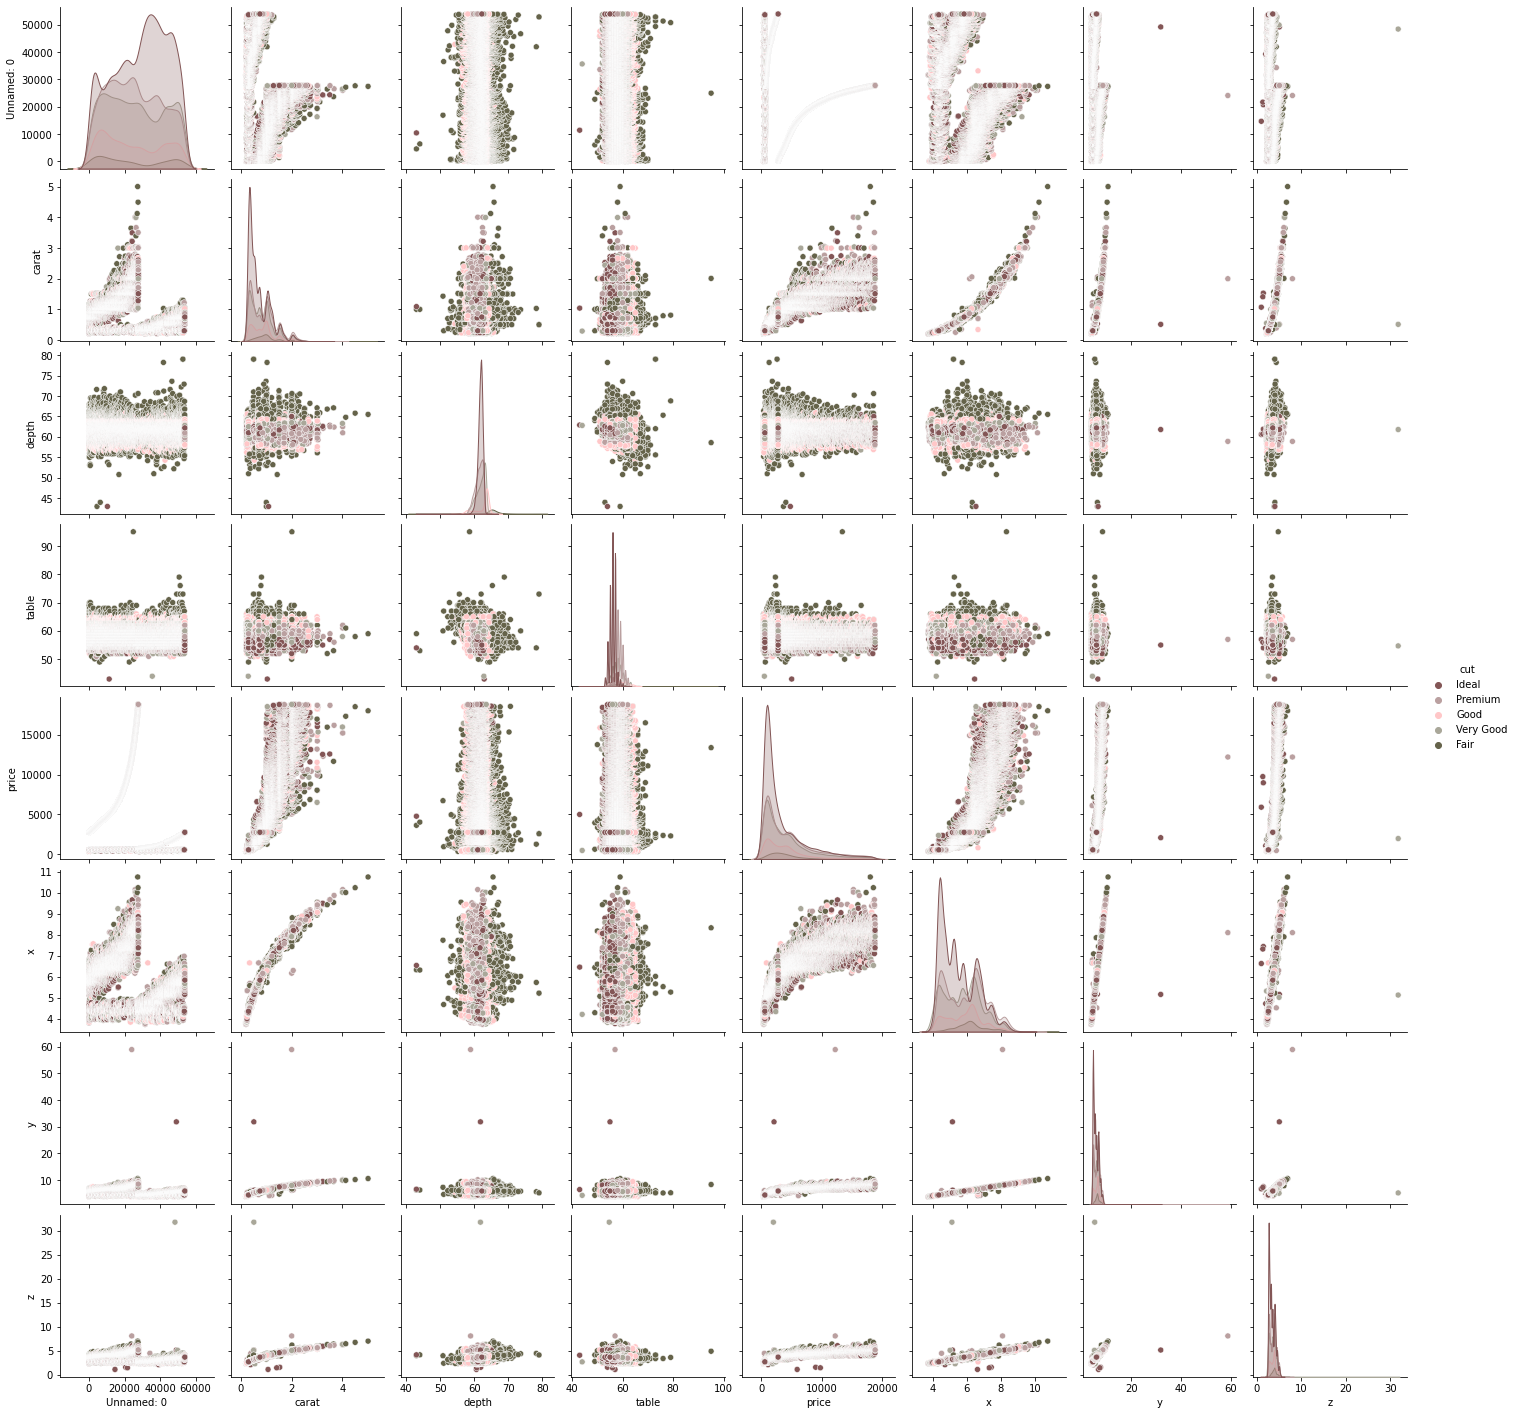

In [8]:
shade = ["#835656", "#baa0a0", "#ffc7c8", 
         "#a9a799", "#65634a"]#shades for hue
ax = sns.pairplot(data, 
                  hue= "cut",palette=shade)

Some features with a data point that are far from the rest of the dataset will affect the outcome of our regression model, such as:

y and z have dimensional outliers in our dataset that need to be eliminated.
The depth should be capped but we have to look at the regression line to be sure.
The table presented must also be capped.
Now let’s remove all the outliers in the dataset:

In [9]:
#Dropping the outliers. 
data = data[(data["depth"]<75)&(data["depth"]>45)]
data = data[(data["table"]<80)&(data["table"]>40)]
data = data[(data["x"]<30)]
data = data[(data["y"]<30)]
data = data[(data["z"]<30)&(data["z"]>2)]

Now let’s have a look at the categorical features in the dataset:

In [10]:
s = (data.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


Now I will do some label encoding on the data to get rid of object dtype:

In [11]:
label_data = data.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])

Finally, let’s have a look at the correlation between the features before training a model for the task of Diamond Price prediction:

<AxesSubplot:>

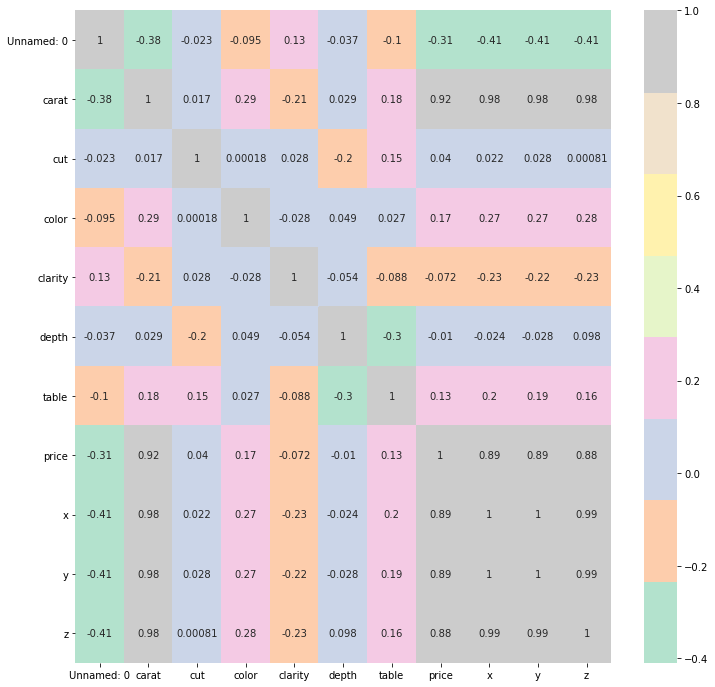

In [12]:
corrmat= label_data.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap="Pastel2",annot=True)

## Observations:
x, y and z show a strong correlation with the target column.
The depth, cut and table columns show a weak correlation. We might consider giving up but let’s keep it.

## Final Step: Dimond Price Prediction Model
Now let’s move to the final step for the task of creating a machine learning model for predicting the price of diamonds. Below is the complete process that we need to follow in this step:

## Features and target configuration
1. Create a pipeline of scalars and standard models for five different regressors.
2. Fit all models to training data
3. Obtain the cross-validation mean on the training set for all negative mean squared error models
4. Choose the model with the best cross-validation score
5. Ride the best model on the training set

#### Now let’s implement all the steps mentioned above to train a machine learning model for the task of Diamond Price Prediction:

In [14]:
# Assigning the featurs as X and trarget as y
X= label_data.drop(["price"],axis =1)
y= label_data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

# Building pipelins of standard scaler and model for varios regressors.

pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])


#pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
#("rf_classifier",XGBRegressor())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)
    
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -1344.798387 
DecisionTree: -51.645452 
RandomForest: -35.506318 
KNeighbors: -666.216132 


From the above scores, XGBClassifier appears to be the model with the best score on the negative mean squared error. Let’s test this model on the test set and evaluate with different parameters:

In [16]:
pred = pipeline_rf.predict(X_test)
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.9999578181890917
Adjusted R^2: 0.999957786864414
MAE: 3.103214365214819
MSE: 661.740836655042
RMSE: 25.724323832805442
